In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

C:\Users\ASUS\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
df=pd.read_csv('next.csv')
df

,society,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,BHK,...,Dining Table,Washing Machine,Exhaust Fan,Chimney,Light,Sofa,Fan,Bed,furnishing_type,area
0,maa bhagwati residency,45.0,5000.0,2.0,2.0,1.0,4.0,West,Relatively New,2,...,0,0,0,0,0,0,0,0,0,0.009000
1,Apna Enclave,50.0,7692.0,2.0,2.0,1.0,1.0,West,Old Property,2,...,0,0,0,0,0,0,0,0,2,0.006500
2,Tulsiani Easy in Homes,40.0,6722.0,2.0,2.0,3.0,12.0,NaN,New Property,2,...,0,0,0,0,0,0,0,0,0,0.005951
3,Smart World Orchard,147.0,12250.0,2.0,2.0,2.0,2.0,NaN,Under Construction,2,...,0,0,0,0,0,0,0,0,0,0.012000
4,Parkwood Westend,70.0,5204.0,2.0,2.0,3.0,5.0,NaN,Under Construction,2,...,0,0,0,0,0,0,0,0,0,0.013451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3008,Ansal Heights,105.0,5541.0,3.0,3.0,3.0,9.0,North-East,Under Construction,3,...,0,0,0,0,0,0,0,0,0,0.018950
3009,Parsvnath Green Ville,330.0,9984.0,5.0,5.0,3.0,4.0,NaN,Old Property,5,...,0,0,0,0,0,0,0,0,0,0.033053
3010,Raheja Vedaanta,95.0,5214.0,3.0,3.0,3.0,3.0,NaN,Relatively New,3,...,0,0,0,0,0,0,0,0,0,0.018220
3011,Ambience Lagoon,580.0,12500.0,3.0,4.0,3.0,9.0,North-East,Old Property,3,...,0,0,0,0,0,0,0,0,1,0.046400


In [5]:
columns=['price','price_per_sqft','bedRoom','bathroom','balcony','floorNum','BHK','Total Floors',
        'Servant_Room','Study_Room','Pooja_Room','Store_Room','Carpet_Area','Built_Up_Area','Super_BuiltUp_Area','luxury_score','furnishing_type']

In [6]:
df['society']=df['society'].apply(lambda x: x.lower())
df['Location']=df['Location'].apply(lambda x: x.lower())

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3013 entries, 0 to 3012
Data columns (total 67 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   society             3013 non-null   object 
 1   price               2993 non-null   float64
 2   price_per_sqft      3011 non-null   float64
 3   bedRoom             2994 non-null   float64
 4   bathroom            2994 non-null   float64
 5   balcony             2994 non-null   float64
 6   floorNum            2993 non-null   float64
 7   facing              2122 non-null   object 
 8   agePossession       3013 non-null   object 
 9   BHK                 3013 non-null   int64  
 10  Location            3013 non-null   object 
 11  Total Floors        2993 non-null   float64
 12  Servant_Room        3013 non-null   int64  
 13  Study_Room          3013 non-null   int64  
 14  Pooja_Room          3013 non-null   int64  
 15  Store_Room          3013 non-null   int64  
 16  Carpet

<Axes: xlabel='price', ylabel='facing'>

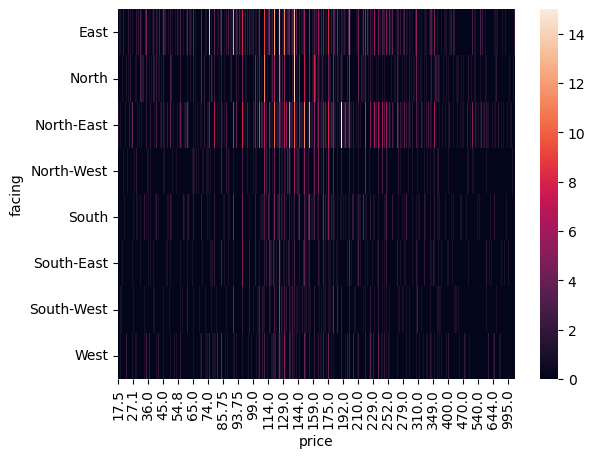

In [8]:
sns.heatmap(pd.crosstab(df['facing'],df['price']))

## Outlier Detection

In [9]:
def outlier_detection(x):
    x=x.dropna()
    q1=np.quantile(x,0.25)
    q3=np.quantile(x,0.75)
    iqr=q3-q1
    lb=q1-1.5*iqr
    ub=q3+1.5*iqr
    return lb,ub

In [10]:
lb_s,ub_s=outlier_detection(df['price_per_sqft'])
outliers=df[(df['price_per_sqft']<lb_s) | (df['price_per_sqft']>ub_s)]
print(outliers['price_per_sqft'].describe())

count       102.000000
mean      27062.156863
std       25593.486881
min       18090.000000
25%       19221.250000
50%       20947.500000
75%       25649.500000
max      200000.000000
Name: price_per_sqft, dtype: float64


In [11]:
df=df[df['price_per_sqft']<=50000]

In [12]:
df[df['price_per_sqft']>30000][columns]

,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,BHK,Total Floors,Servant_Room,Study_Room,Pooja_Room,Store_Room,Carpet_Area,Built_Up_Area,Super_BuiltUp_Area,luxury_score,furnishing_type
281,570.0,41245.0,3.0,3.0,3.0,1.0,3,1.0,0,0,0,0,NaN,1382.0,NaN,0,0
306,390.0,33209.0,3.0,4.0,3.0,33.0,3,42.0,1,0,0,0,1249.65,NaN,NaN,62,0
673,1100.0,35483.0,4.0,5.0,3.0,7.0,4,36.0,1,1,1,0,3100.00,NaN,NaN,28,1
1053,485.0,30180.0,3.0,4.0,3.0,6.0,3,30.0,1,0,0,0,1607.00,1785.0,1983.0,62,1
2101,30.0,41666.0,1.0,1.0,0.0,0.0,1,2.0,0,1,0,0,72.00,NaN,NaN,7,0
2275,260.0,46917.0,2.0,2.0,2.0,6.0,2,19.0,0,0,0,0,554.16,NaN,NaN,20,0
2721,570.0,41245.0,3.0,3.0,3.0,1.0,3,1.0,0,0,0,0,NaN,1382.0,NaN,0,0
2839,NaN,33198.0,NaN,NaN,NaN,NaN,4,NaN,0,0,0,0,NaN,NaN,NaN,0,0
2842,740.0,33198.0,4.0,4.0,3.0,21.0,4,36.0,0,0,0,0,2229.00,NaN,NaN,19,0
2941,150.0,50000.0,1.0,1.0,0.0,0.0,1,1.0,0,0,0,0,NaN,300.0,NaN,0,0


In [13]:
df.drop(index=[2839,673,2842],inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11028\1479930178.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(index=[2839,673,2842],inplace=True)


C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price_per_sqft', ylabel='Density'>

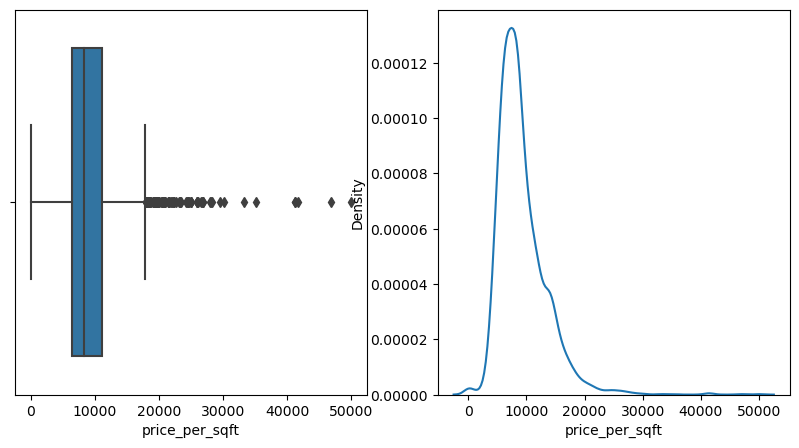

In [14]:
fig,axes=plt.subplots(1,2,figsize=(10,5))
sns.boxplot(x=df['price_per_sqft'],ax=axes[0])
sns.kdeplot(x=df['price_per_sqft'],ax=axes[1])

In [15]:
lb,ub=outlier_detection(df['price'])
df[(df['price']<lb) | (df['price']>ub)]['price'].describe()

count     201.000000
mean      546.875622
std       174.452915
min       372.000000
25%       425.000000
50%       500.000000
75%       615.000000
max      1500.000000
Name: price, dtype: float64

In [16]:
df=df[df['price']<=800]

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Density'>

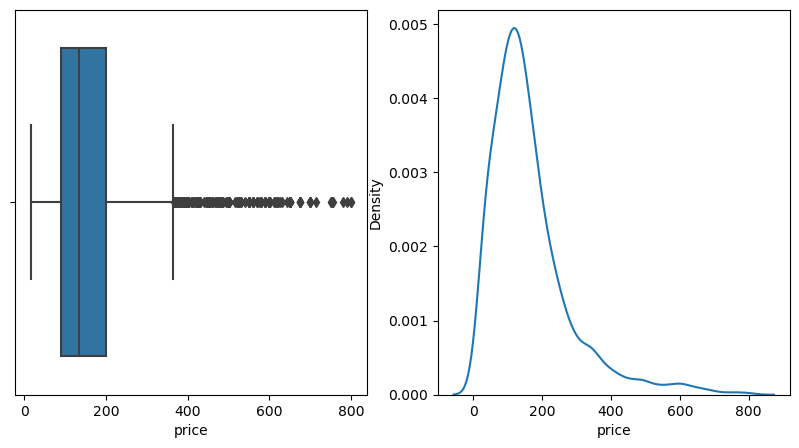

In [17]:
fig,axes=plt.subplots(1,2,figsize=(10,5))
sns.boxplot(x=df['price'],ax=axes[0])
sns.kdeplot(x=df['price'],ax=axes[1])

In [19]:
df[df['floorNum'].isnull()]
df.drop(index=180,inplace=True)

In [20]:
lb,ub=outlier_detection(df['Carpet_Area'])
outliers=df[(df['Carpet_Area']<lb) | (df['Carpet_Area']>ub)]
outliers[columns]

,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,BHK,Total Floors,Servant_Room,Study_Room,Pooja_Room,Store_Room,Carpet_Area,Built_Up_Area,Super_BuiltUp_Area,luxury_score,furnishing_type
81,46.0,79.0,2.0,2.0,1.0,0.0,2,14.0,0,0,0,0,58141.0,NaN,NaN,8,0
113,45.0,7.0,2.0,2.0,2.0,2.0,2,19.0,0,0,0,0,569243.0,NaN,NaN,36,0
142,291.0,6700.0,4.0,4.0,3.0,6.0,4,6.0,1,1,0,1,3480.0,NaN,4350.0,53,2
172,335.0,7444.0,4.0,4.0,3.0,2.0,4,4.0,0,1,0,0,4500.0,NaN,NaN,20,0
218,385.0,7500.0,5.0,6.0,3.0,6.0,5,7.0,1,0,1,0,5140.0,NaN,NaN,50,2
287,615.0,15998.0,3.0,5.0,3.0,1.0,3,14.0,1,0,0,0,3844.0,NaN,NaN,28,1
290,325.0,7510.0,4.0,4.0,3.0,17.0,4,17.0,1,0,0,0,4328.0,NaN,NaN,53,2
319,615.0,15998.0,3.0,5.0,3.0,1.0,3,14.0,1,0,0,0,3844.0,NaN,NaN,28,1
375,650.0,18571.0,4.0,5.0,3.0,3.0,4,4.0,1,0,0,0,3500.0,NaN,NaN,21,1
384,425.0,13281.0,3.0,4.0,3.0,3.0,3,9.0,1,0,0,1,3156.0,NaN,3200.0,38,2


In [21]:
df.drop(index=outliers[outliers['Carpet_Area']>6000].index,inplace=True)

In [22]:
lb,ub=outlier_detection(df['Built_Up_Area'])
outliers=df[(df['Built_Up_Area']<lb) | (df['Built_Up_Area']>ub)]
outliers[columns]

,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,BHK,Total Floors,Servant_Room,Study_Room,Pooja_Room,Store_Room,Carpet_Area,Built_Up_Area,Super_BuiltUp_Area,luxury_score,furnishing_type
26,615.0,18331.0,3.0,4.0,2.0,20.0,3,20.0,0,0,0,0,2200.00,3355.00,NaN,0,0
160,145.0,15664.0,3.0,2.0,3.0,20.0,3,22.0,0,1,0,0,86.00,118.00,NaN,53,0
266,70.0,5556.0,3.0,3.0,2.0,14.0,3,20.0,0,0,0,0,NaN,140.00,NaN,19,0
283,400.0,9851.0,4.0,4.0,3.0,17.0,4,17.0,0,0,0,0,NaN,3350.00,NaN,0,0
300,105.0,10603.0,2.0,2.0,1.0,15.0,2,32.0,0,0,0,0,92.00,97.00,NaN,27,0
327,105.0,10603.0,2.0,2.0,1.0,15.0,2,32.0,0,0,0,0,92.00,97.00,NaN,27,0
420,549.0,11584.0,4.0,5.0,3.0,5.0,4,25.0,1,0,0,0,NaN,3655.35,4739.0,62,2
500,531.0,11204.0,4.0,6.0,3.0,15.0,4,28.0,1,0,1,0,3400.00,3573.33,4739.0,34,0
503,410.0,10567.0,5.0,5.0,2.0,10.0,5,15.0,1,0,0,0,3000.00,3500.00,3880.0,53,0
508,355.0,6826.0,5.0,6.0,3.0,11.0,5,12.0,1,1,1,1,4700.00,5200.00,NaN,44,2


In [23]:
df.drop(index=outliers[(outliers['Built_Up_Area']<1000)|(outliers['Built_Up_Area']>5000)].index,inplace=True)

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Carpet_Area', ylabel='Density'>

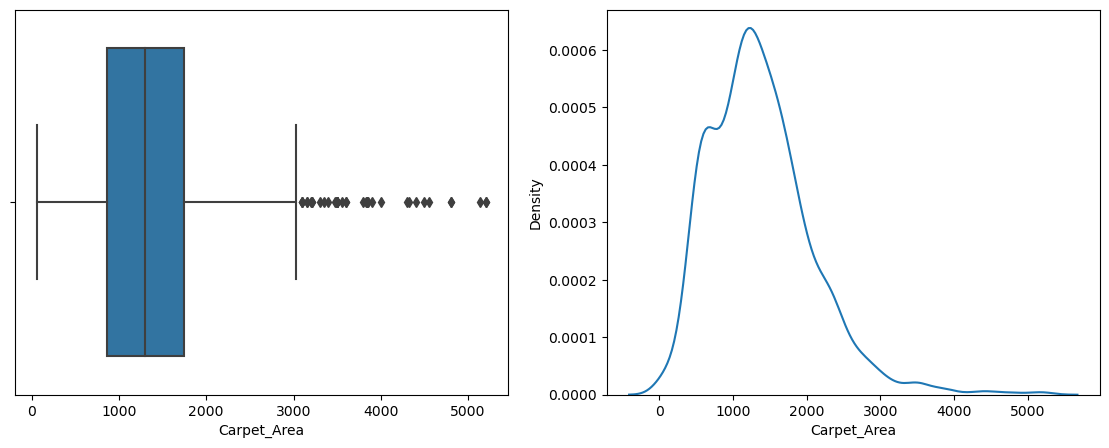

In [24]:
fig,axes=plt.subplots(1,2,figsize=(14,5))
sns.boxplot(x=df['Carpet_Area'],ax=axes[0])
sns.kdeplot(x=df['Carpet_Area'],ax=axes[1])

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Built_Up_Area', ylabel='Density'>

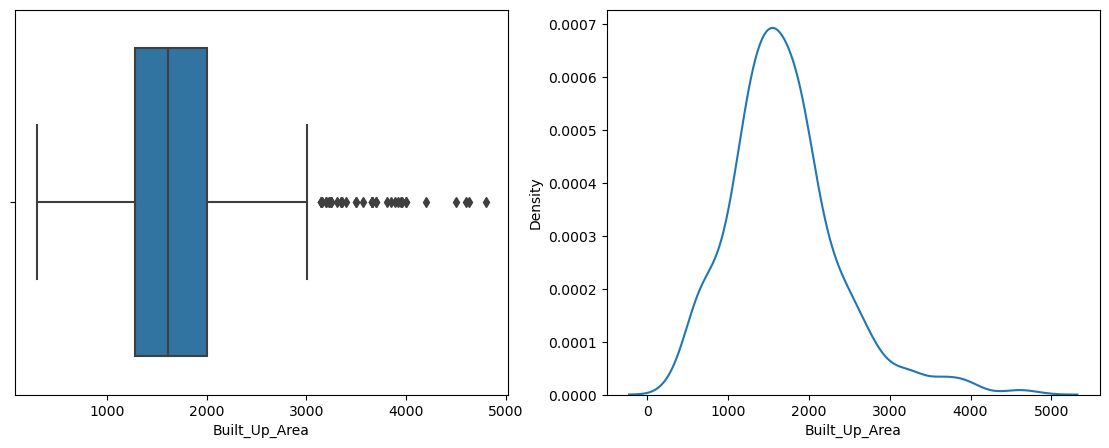

In [25]:
fig,axes=plt.subplots(1,2,figsize=(14,5))
sns.boxplot(x=df['Built_Up_Area'],ax=axes[0])
sns.kdeplot(x=df['Built_Up_Area'],ax=axes[1])

In [26]:
lb,ub=outlier_detection(df['Super_BuiltUp_Area'])
outliers=df[(df['Super_BuiltUp_Area']<lb) | (df['Super_BuiltUp_Area']>ub)]
outliers[columns]

,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,BHK,Total Floors,Servant_Room,Study_Room,Pooja_Room,Store_Room,Carpet_Area,Built_Up_Area,Super_BuiltUp_Area,luxury_score,furnishing_type
82,450.0,10599.0,5.0,5.0,3.0,11.0,5,11.0,1,0,0,0,NaN,NaN,3670.0,43,2
106,110.0,11482.0,2.0,2.0,3.0,9.0,2,30.0,0,0,0,0,NaN,NaN,89.0,0,0
134,250.0,12920.0,3.0,3.0,2.0,2.0,3,4.0,0,0,0,0,NaN,NaN,215.0,0,0
142,291.0,6700.0,4.0,4.0,3.0,6.0,4,6.0,1,1,0,1,3480.0,NaN,4350.0,53,2
344,425.0,9334.0,4.0,5.0,3.0,14.0,4,14.0,0,1,0,0,NaN,NaN,4553.0,9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,270.0,7754.0,4.0,4.0,3.0,23.0,4,26.0,0,0,0,0,NaN,NaN,3482.0,15,0
2887,145.0,8367.0,2.0,2.0,3.0,9.0,2,15.0,0,1,0,0,108.4,NaN,161.0,25,1
2949,22.0,6470.0,1.0,1.0,1.0,2.0,1,15.0,0,0,0,0,NaN,NaN,340.0,0,0
2970,39.0,9846.0,1.0,1.0,2.0,1.0,1,3.0,0,0,0,0,NaN,NaN,325.0,0,0


In [27]:
df.drop(index=outliers[(outliers['Super_BuiltUp_Area']<1200)|(outliers['Super_BuiltUp_Area']>6000)].index,inplace=True)

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Super_BuiltUp_Area', ylabel='Density'>

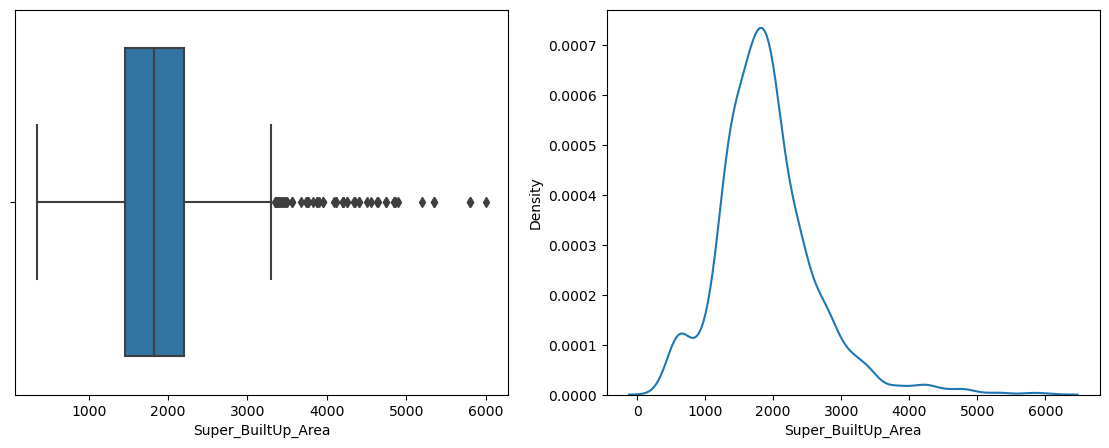

In [28]:
fig,axes=plt.subplots(1,2,figsize=(14,5))
sns.boxplot(x=df['Super_BuiltUp_Area'],ax=axes[0])
sns.kdeplot(x=df['Super_BuiltUp_Area'],ax=axes[1])

In [29]:
df

,society,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,BHK,...,Dining Table,Washing Machine,Exhaust Fan,Chimney,Light,Sofa,Fan,Bed,furnishing_type,area
0,maa bhagwati residency,45.0,5000.0,2.0,2.0,1.0,4.0,West,Relatively New,2,...,0,0,0,0,0,0,0,0,0,0.009000
1,apna enclave,50.0,7692.0,2.0,2.0,1.0,1.0,West,Old Property,2,...,0,0,0,0,0,0,0,0,2,0.006500
2,tulsiani easy in homes,40.0,6722.0,2.0,2.0,3.0,12.0,NaN,New Property,2,...,0,0,0,0,0,0,0,0,0,0.005951
3,smart world orchard,147.0,12250.0,2.0,2.0,2.0,2.0,NaN,Under Construction,2,...,0,0,0,0,0,0,0,0,0,0.012000
4,parkwood westend,70.0,5204.0,2.0,2.0,3.0,5.0,NaN,Under Construction,2,...,0,0,0,0,0,0,0,0,0,0.013451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3007,dlf regency park,135.0,11992.0,2.0,2.0,2.0,1.0,NaN,Moderately Old,2,...,0,0,0,0,0,0,0,0,0,0.011258
3008,ansal heights,105.0,5541.0,3.0,3.0,3.0,9.0,North-East,Under Construction,3,...,0,0,0,0,0,0,0,0,0,0.018950
3009,parsvnath green ville,330.0,9984.0,5.0,5.0,3.0,4.0,NaN,Old Property,5,...,0,0,0,0,0,0,0,0,0,0.033053
3010,raheja vedaanta,95.0,5214.0,3.0,3.0,3.0,3.0,NaN,Relatively New,3,...,0,0,0,0,0,0,0,0,0,0.018220


## Imputation

In [34]:
df['facing'].isnull().sum()/2939*100

29.057502551888398

Since facing has around 30% missing values and we saw during eda, it doesnt considerably affect price, we will be dropping it

In [35]:
df.drop(columns='facing',inplace=True)

In [41]:
df.drop_duplicates(inplace=True)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2812 entries, 0 to 3011
Data columns (total 66 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   society             2812 non-null   object 
 1   price               2812 non-null   float64
 2   price_per_sqft      2812 non-null   float64
 3   bedRoom             2812 non-null   float64
 4   bathroom            2812 non-null   float64
 5   balcony             2812 non-null   float64
 6   floorNum            2812 non-null   float64
 7   agePossession       2812 non-null   object 
 8   BHK                 2812 non-null   int64  
 9   Location            2812 non-null   object 
 10  Total Floors        2812 non-null   float64
 11  Servant_Room        2812 non-null   int64  
 12  Study_Room          2812 non-null   int64  
 13  Pooja_Room          2812 non-null   int64  
 14  Store_Room          2812 non-null   int64  
 15  Carpet_Area         1711 non-null   float64
 16  Built_Up_Ar

In [43]:
df[columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 2812 entries, 0 to 3011
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               2812 non-null   float64
 1   price_per_sqft      2812 non-null   float64
 2   bedRoom             2812 non-null   float64
 3   bathroom            2812 non-null   float64
 4   balcony             2812 non-null   float64
 5   floorNum            2812 non-null   float64
 6   BHK                 2812 non-null   int64  
 7   Total Floors        2812 non-null   float64
 8   Servant_Room        2812 non-null   int64  
 9   Study_Room          2812 non-null   int64  
 10  Pooja_Room          2812 non-null   int64  
 11  Store_Room          2812 non-null   int64  
 12  Carpet_Area         1711 non-null   float64
 13  Built_Up_Area       884 non-null    float64
 14  Super_BuiltUp_Area  1871 non-null   float64
 15  luxury_score        2812 non-null   int64  
 16  furnishing_

In [44]:
# Area needs to be imputed mainly